# Neuron networks from scratch in Python
References: http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202024%20-%20G/CSE%20%20IT%20AIDS%20ML/Neural%20Network.pdf

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

## Chapter 5: Calculating Network Error with Loss

### 

### 5.1 Categorical Cross-Entropy Loss

In [12]:
# Python
def compute_cross_entropy_loss(softmax_output, target_output):
    return - sum(target_output[i] * math.log(softmax_output[i]) for i in range(len(softmax_output)))

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

print('Cross-entropy loss:', compute_cross_entropy_loss(softmax_output, target_output))

Cross-entropy loss: 0.35667494393873245


In [13]:
# Numpy
def compute_cross_entropy_loss(softmax_output, target_output):
    return - np.sum(target_output * np.log(softmax_output))

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

print('Cross-entropy loss:', compute_cross_entropy_loss(softmax_output, target_output))

Cross-entropy loss: 0.35667494393873245


In [14]:
# More samples
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets1 = np.array([0, 1, 1])
class_targets2 = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 1, 0]])

def calculate_avg_loss(softmax_outputs, class_targets):
    result = 0
    if len(class_targets.shape) == 1:
        result =  np.mean(-np.log(softmax_outputs[np.arange(len(softmax_outputs)), class_targets]))

    elif len(class_targets.shape) == 2: 
        result = np.mean(-np.log(np.sum(softmax_outputs * class_targets, axis=1)))

    return np.clip(result, 1e-7, 1 - 1e-7)

print('Average loss of targets class 1:', calculate_avg_loss(softmax_outputs, class_targets1))
print('Average loss of targets class 2:', calculate_avg_loss(softmax_outputs, class_targets2))


Average loss of targets class 1: 0.38506088005216804
Average loss of targets class 2: 0.38506088005216804


### 5.2 The Categorical Cross-Entropy Loss Class

In [15]:
class Loss:
    def calculate(self, output, y):
        return np.mean(self.forward(output, y))
    
class CrossEntropyLoss(Loss):
    def forward(self, y_pred, y_true):

        correct_confidences = 0

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(len(y_pred_clipped)), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        return - np.log(correct_confidences)

class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Relu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

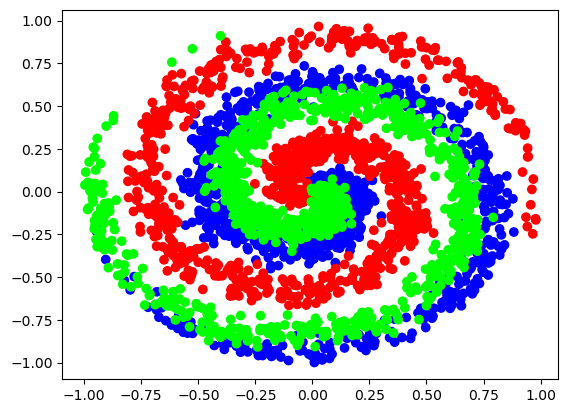

In [16]:
X, y = spiral_data(samples=1000, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

In [17]:
dense1 = Dense(2, 1000)
activation1 = Relu()
dense2 = Dense(1000, 3)
activation2 = Softmax()
loss_function = CrossEntropyLoss()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
loss = loss_function.calculate(activation2.output, y)

print(activation2.output[:10])
print('Loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.3333347  0.333332   0.3333333 ]
 [0.3333363  0.33333084 0.33333293]
 [0.33333802 0.3333302  0.33333176]
 [0.3333397  0.33332893 0.33333132]
 [0.3333379  0.33332664 0.33333546]
 [0.33334222 0.33332586 0.3333319 ]
 [0.33334184 0.33332393 0.33333427]
 [0.33334318 0.3333226  0.3333342 ]
 [0.333346   0.3333217  0.33333236]]
Loss: 1.0986413


### 5.3 Accuracy

In [18]:
def calculate_acc(y_pred, y):
    predictions = np.argmax(y_pred, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    return np.mean(predictions == y)

In [19]:
print('Accuracy:', calculate_acc(activation2.output, y))

Accuracy: 0.3423333333333333


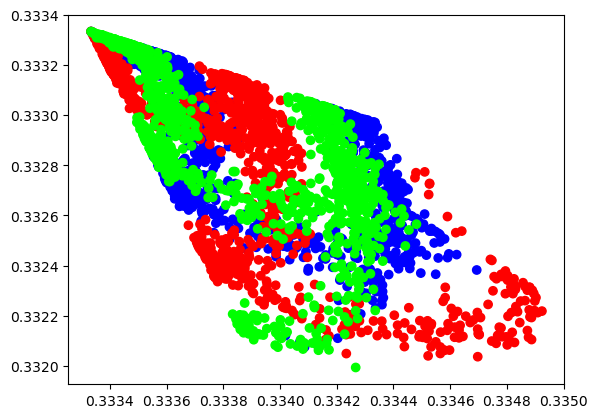

In [20]:
plt.scatter(activation2.output[:, 0], activation2.output[:, 1], c=y, cmap='brg')
plt.show()